### CUSTOMER SEGMENTATION

TASK : Segmenting customers based on demographic and behavioural traits to get insights about campaign performance and purchasing patterns

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv("Downloads/marketing_campaign.csv",index_col= 'ID')

In [3]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

## About The Data 

CUSTOMER DETAILS:

    ID: the unique identification code for every customer
    
    Year_Birth: The Year of a customer’s birth
    
    Education: The level of education that a customer completed
    
    Marital_Status: Status of Marriage
    
    Income: Annual Income
    
    Kidhome: # of children under the age of 13 in Customer’s household
    
    Teenhome: # of children between 13–19 in Customer’s household
    
    Dt_Customer: Date of Customer Enrollment
    
    Recency: # of days since last purchase
    
    Complain: 1 if customer complained in the last 2 years, 0 otherwise
    
PRODUCTS:

    MntWines: Dollar amount of Wines purchased in last 2 years
    
    MntFruits: Dollar amount of Fruits purchased in last 2 years
    
    MntMeatProducts: Dollar amount of Meat products purchased in the last 2 years
    
    MntFishProducts: Dollar amount of Fish products purchased in the last 2 years
    
    MntSweetProducts: Dollar amount of Sweet products purchased in the last 2 years
    
    MntGoldProds: Dollar amount of Gold products purchased in the last 2 years
    
PLACE OF PURCHASE:

    NumDealsPurchases: # of purchases made with discount
    
    NumWebPurchases: # of purchases made through the company’s website
    
    NumCatalogPurchases: # of purchases made using the catalog
    
    NumStorePurchases: # of purchases made directly in-store
    
    NumWebVisitsMonth: # of visits made through the company’s website
    
PROMOTION:

    AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
    
    AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
    
    AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
    
    AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
    
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

    Z_Cost
    
    Z_Revenue
    


In [5]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df['Income'].isnull().mean()

0.010714285714285714

we got to know that income has null values and that too 1.07% so we going to drop those nan values

In [7]:
df.dropna(axis = 0,inplace = True)

In [8]:
df.shape

(2216, 28)

Need to find customer's age,total spendings and no of children 

its an old data set so considering the age when they became customers

In [9]:
df[['day','month','year']]=df["Dt_Customer"].str.split('-',n=2, expand=True)
df['year']=df['year'].astype(int)
df['Age'] = df['year']-df['Year_Birth']

df['Total_Spending'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df['No_Of_Children']=df['Kidhome']+df['Teenhome']

using ordinal encoding to convert catogorical feature into numeric

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
values1 = { 
        'Single': 0,
        'Married': 1,
        'Together':1,
        'Divorced':0,
        'Widow':0,
        'Alone':0,
        'Absurd':0,
        'YOLO':0
   }
df['Marital_Status_New']=df['Marital_Status'].replace(values1)

Marital_Status_New : 1 if customer is living with partner otherwise 0

In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
df["Education_New"] = df["Education"].replace({"Graduation":2, "PhD":4, "Master":3, "2n Cycle":3, "Basic":1})


BASED ON CUSTOMER'S EDUCATION QUALIFICATION VALUES ARE GIVEN.
ASSIGNING GREATER VALUE TO THEIR QUALIFICATION

Education_New:tion :

    basic education - 1
    graduates - 2
    masters - 3
    phD - 4

In [14]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_Revenue,Response,day,month,year,Age,Total_Spending,No_Of_Children,Marital_Status_New,Education_New
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,11,1,04,09,2012,55,1617,0,0,2
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,11,0,08,03,2014,60,27,2,0,2
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,11,0,21,08,2013,48,776,0,1,2
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,11,0,10,02,2014,30,53,1,1,2
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,11,0,19,01,2014,33,422,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,11,0,13,06,2013,46,1341,1,1,2
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,11,0,10,06,2014,68,444,3,1,4
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,11,0,25,01,2014,33,1241,0,0,2


dropping redentent features which does not add much value to further analysis

In [ ]:
x = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [15]:
df = df.drop(['Year_Birth','Dt_Customer','day','month','year','Z_CostContact', 'Z_Revenue','Complain'],axis= 1)

## Detecting & Removing Outliers

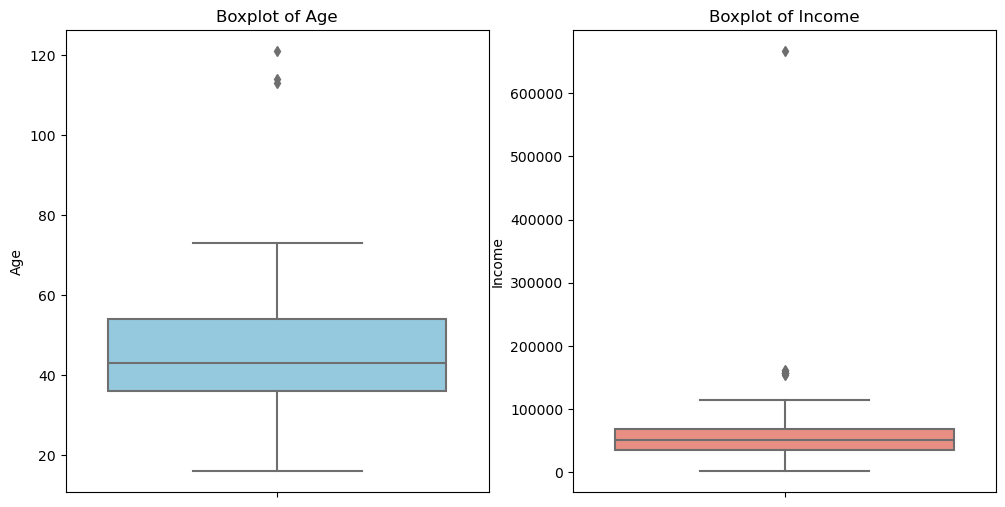

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=axes[0], y=df['Age'], color="skyblue")
axes[0].set_title('Boxplot of Age')

# Boxplot for 'income'
sns.boxplot(ax=axes[1], y=df['Income'], color="salmon")
axes[1].set_title('Boxplot of Income')

plt.show()

Both Age and Income column has less number of outliers.

we going to use z-score method to find the values of outliers and then replacing it with lesser values. 

In [17]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [18]:
mean = df['Income'].mean()
std = df['Income'].std()
threshold  = 2
z_scores = (df['Income'] - mean) / std
outliers = df[np.abs(z_scores) > threshold]['Income']
outliers.values

array([157243., 102692., 162397., 105471., 153924., 160803.,   1730.,
       157733., 157146., 113734., 156924., 666666.])

In [19]:
df['Age'].describe()

count    2216.000000
mean       44.208032
std        12.023812
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

In [20]:
mean = df['Age'].mean()
std = df['Age'].std()
threshold  = 3
z_scores = (df['Age'] - mean) / std
outliers = df[np.abs(z_scores) > threshold]['Age']
outliers.values

array([113, 121, 114], dtype=int64)

In [21]:
df.loc[df['Income']>100000,'Income']=100000
df.loc[df['Age']>80,'Age']=80

In [22]:
df.reset_index(drop=True)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Total_Spending,No_Of_Children,Marital_Status_New,Education_New
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,55,1617,0,0,2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,60,27,2,0,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,48,776,0,1,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,30,53,1,1,2
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,33,422,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,46,1341,1,1,2
2212,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,68,444,3,1,4
2213,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,33,1241,0,0,2
2214,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,58,843,1,1,3


In [23]:
order = ['Age','Marital_Status_New','Kidhome','Teenhome','No_Of_Children','Education_New','Income','Recency','MntWines','MntFruits','MntMeatProducts',
         'MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spending','NumDealsPurchases','NumWebPurchases',
         'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
         'AcceptedCmp4','AcceptedCmp5','Response',]
df = df[order]

## Exploratory Data Analysis

In [24]:
df.corr()

,Age,Marital_Status_New,Kidhome,Teenhome,No_Of_Children,Education_New,Income,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Age,1.000000,0.001375,-0.233108,0.356625,0.092000,0.143821,0.208579,0.014789,0.153648,0.012668,...,0.148329,0.119326,0.128236,-0.137203,0.013020,0.007353,-0.060937,0.067765,-0.013340,-0.032325
Marital_Status_New,0.001375,1.000000,0.026788,0.031651,0.042195,0.003888,-0.007129,-0.001371,-0.007244,-0.025988,...,0.003455,-0.009855,0.004522,0.003022,0.009115,-0.002932,-0.018735,-0.006595,0.019786,-0.150161
Kidhome,-0.233108,0.026788,1.000000,-0.039869,0.687794,-0.040782,-0.527481,0.011492,-0.497336,-0.373396,...,-0.371977,-0.504501,-0.501349,0.447477,-0.174163,-0.081868,0.016066,-0.162026,-0.205305,-0.077909
Teenhome,0.356625,0.031651,-0.039869,1.000000,0.697907,0.104188,0.038430,0.013838,0.003747,-0.176558,...,0.162077,-0.112692,0.049737,0.131240,-0.144855,-0.015521,-0.042522,0.038376,-0.190791,-0.153901
No_Of_Children,0.092000,0.042195,0.687794,0.697907,1.000000,0.046460,-0.350157,0.018290,-0.353748,-0.395901,...,-0.148871,-0.443474,-0.323213,0.416076,-0.230068,-0.069955,-0.019376,-0.088254,-0.285761,-0.167648
Education_New,0.143821,0.003888,-0.040782,0.104188,0.046460,1.000000,0.126182,-0.020873,0.165115,-0.085986,...,0.072601,0.057566,0.066796,-0.035877,-0.005240,0.018866,0.009573,0.043066,0.015099,0.085162
Income,0.208579,-0.007129,-0.527481,0.038430,-0.350157,0.126182,1.000000,0.006001,0.716529,0.528660,...,0.483020,0.692391,0.664204,-0.652736,0.338806,0.107731,-0.013436,0.228196,0.410672,0.168991
Recency,0.014789,-0.001371,0.011492,0.013838,0.018290,-0.020873,0.006001,1.000000,0.015721,-0.005844,...,-0.005641,0.024081,-0.000434,-0.018564,-0.021061,-0.001400,-0.032257,0.017566,-0.000482,-0.199766
MntWines,0.153648,-0.007244,-0.497336,0.003747,-0.353748,0.165115,0.716529,0.015721,1.000000,0.387024,...,0.553786,0.634753,0.640012,-0.321978,0.351417,0.206185,0.061463,0.373143,0.473550,0.246299
MntFruits,0.012668,-0.025988,-0.373396,-0.176558,-0.395901,-0.085986,0.528660,-0.005844,0.387024,1.000000,...,0.302039,0.486263,0.458491,-0.418729,0.191816,-0.009980,0.014424,0.006396,0.212871,0.122443


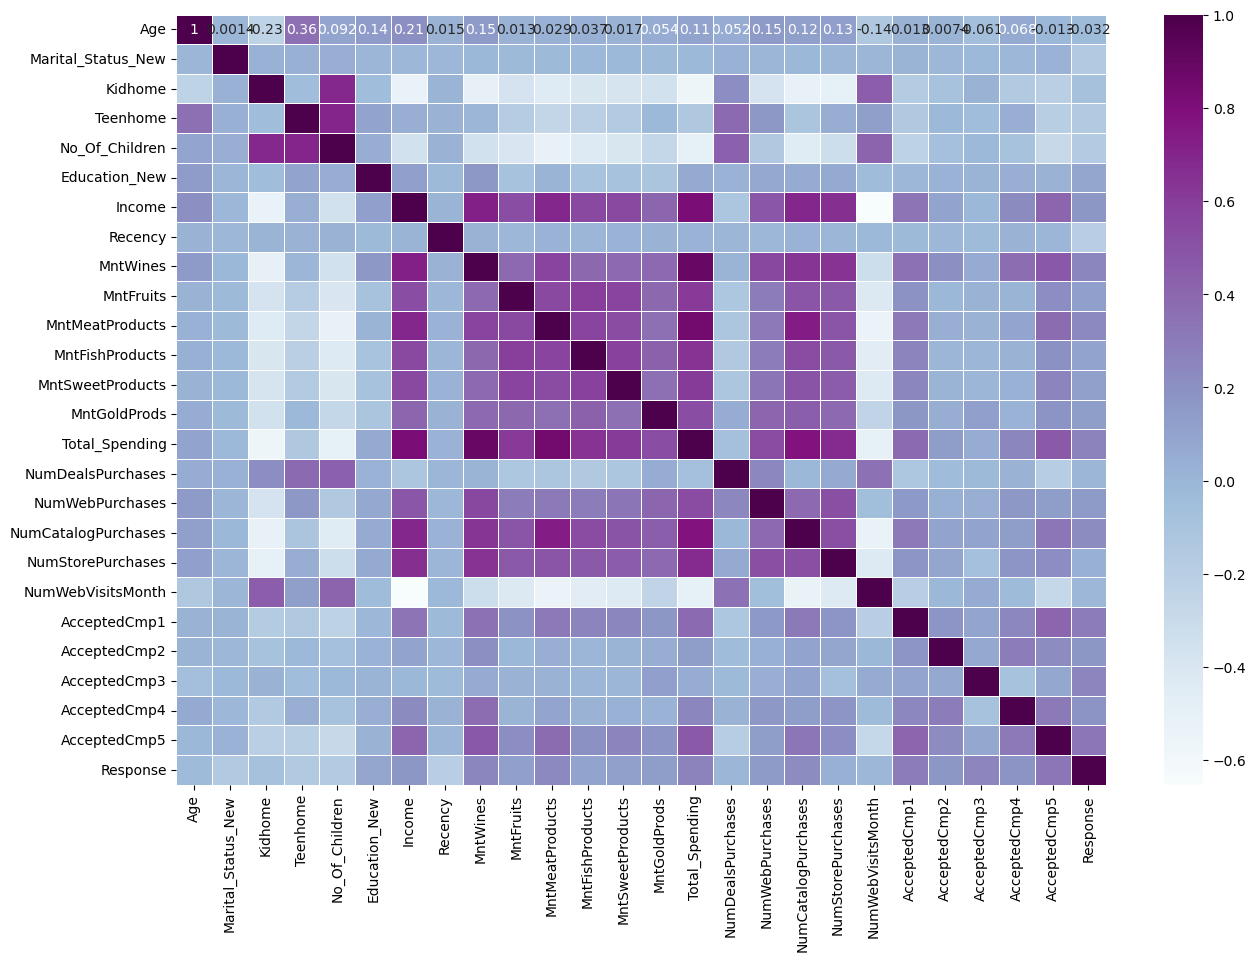

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='BuPu',linewidths=0.5)
plt.savefig('corr.png',dpi= 100)
plt.show()

### distribution of different variables

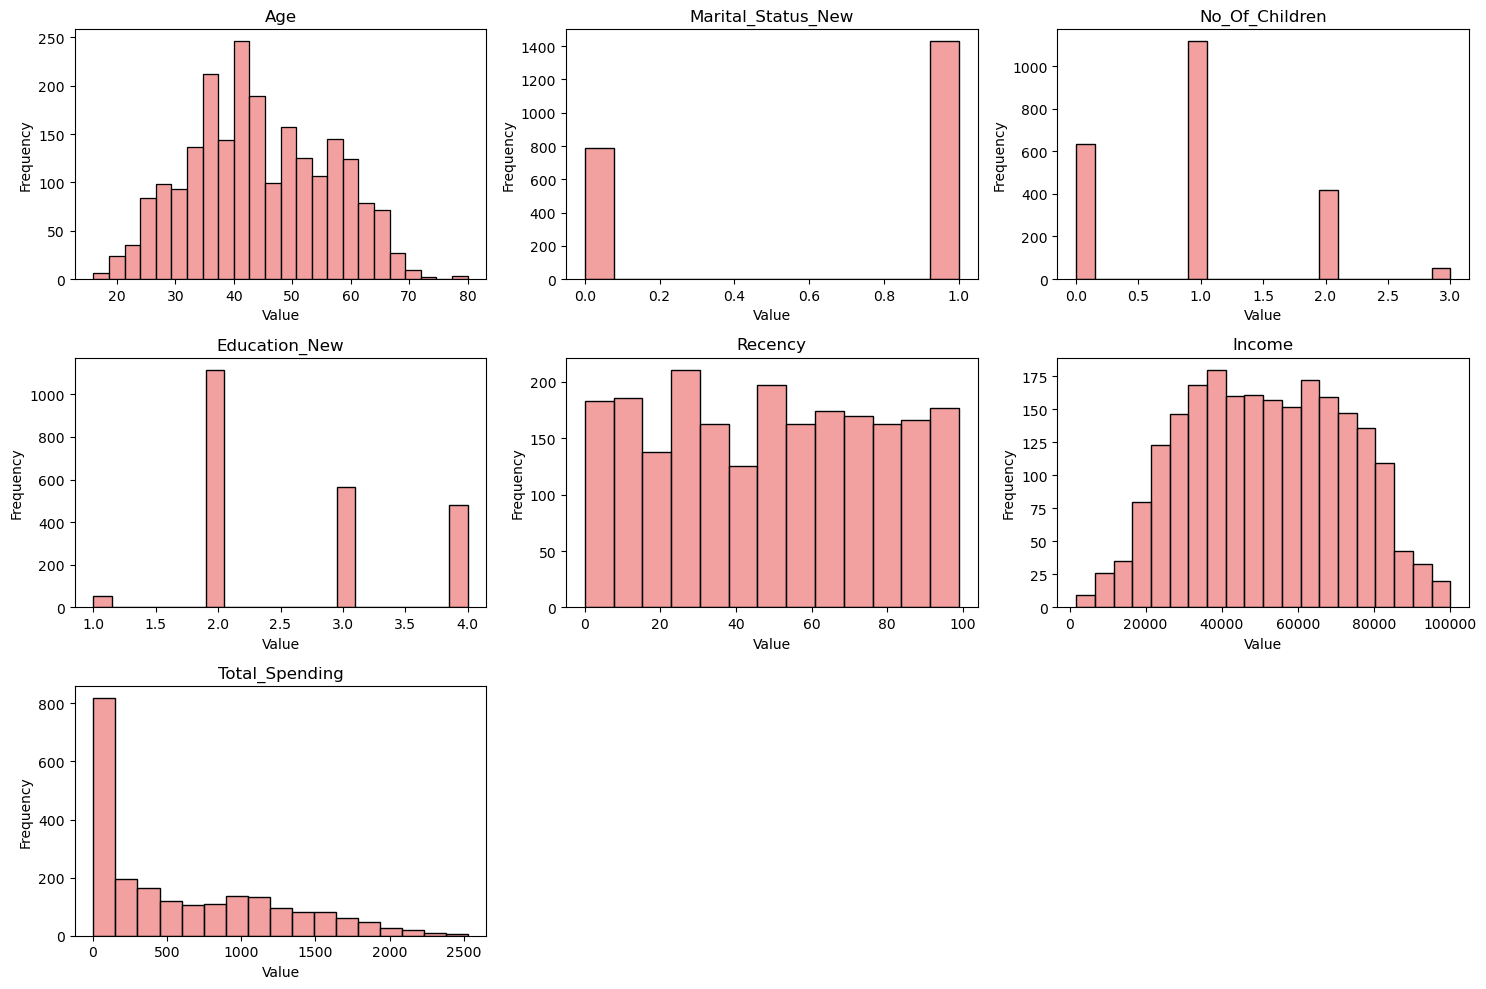

In [26]:
plot=['Age','Marital_Status_New','No_Of_Children','Education_New','Recency','Income','Total_Spending']
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Plot each variable in its own subplot
for i, var in enumerate(plot):
    sns.histplot(df[var], ax=axs[i], color='lightcoral')
    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Hide the empty subplot if there are fewer than 6 variables
for j in range(len(plot), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('distribution.png')
plt.show()


The age distribution spans from 18 to 80, with majority falling within the 35 to 50 range.
More than half of the individuals are partnered, while the rest are single.

Single-child households are predominant.

The majority of customers hold a bachelor's degree.

eIncome folloes a normal distribution, centered between 35,000 and 65,000.

In terms of spending habits, most customers spend less than 500.

Recency graph exhibits a uniform distribution, sugeesting a nearly equal proportion of recent and longstanding customers.







## Kidhome and Teenhome VS Total_Spending

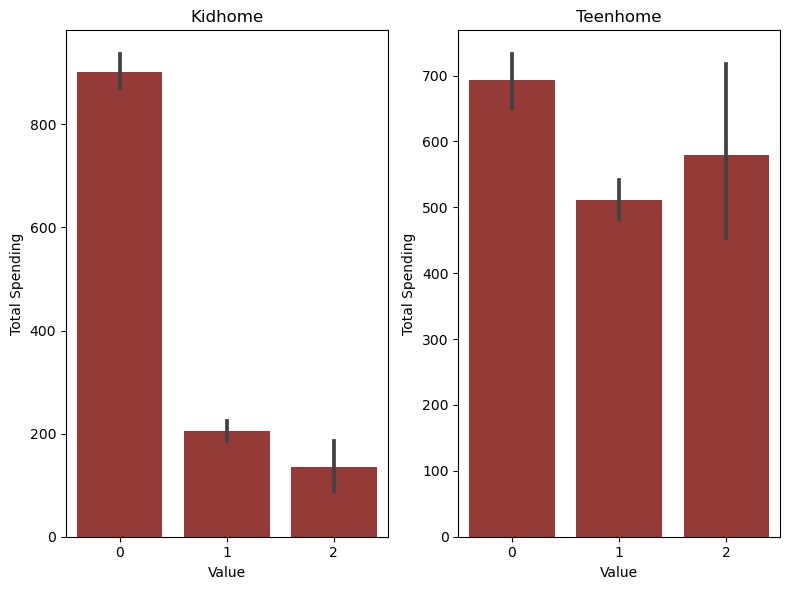

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

x = ['Kidhome', 'Teenhome']
y = df['Total_Spending']

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot each variable in its own subplot
for i, var in enumerate(x):
    sns.barplot(x=df[var], y=y, ax=axs[i], color='brown')
    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Total Spending')

plt.tight_layout()
plt.savefig('kidandteen.png')
plt.show()

Over 70% of customers without children at home tend to spend more compared to those with children.

Moreover, customers without teenagers tend to spend slightly more than those with one or two teenagers.

## Age VS Total_Spending

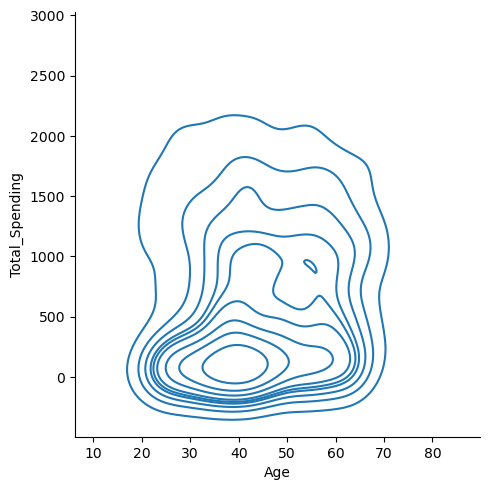

In [28]:
sns.displot(data=df, x='Age', y='Total_Spending', bins=30,kind='kde')
plt.savefig('age.png')

spedning slightly increases with age

but in all age people there is who spends little while others spend great deal of money

there is also two peaks of spending in 30-40 range and 60-70 range

density of people who spends less is higher than other

## Income VS Total_Spending VS Education

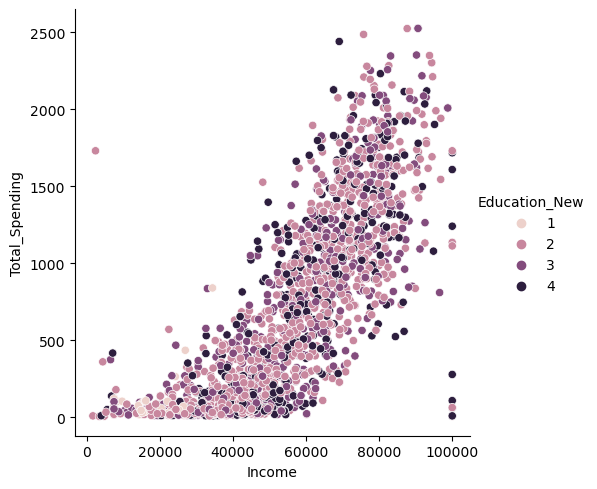

In [29]:
sns.relplot(data=df, x='Income', y='Total_Spending',hue="Education_New")
plt.savefig('Income_edu.png')

There is a clear positive correlation between income and spending,although spending varies
considerablyacross different income levels.
    
Generally, individuals with higher levels of education tend to spend more than those with basic education,
although there are exceptions to this trend.

## Income VS Total_Spending VS No_Of_Children

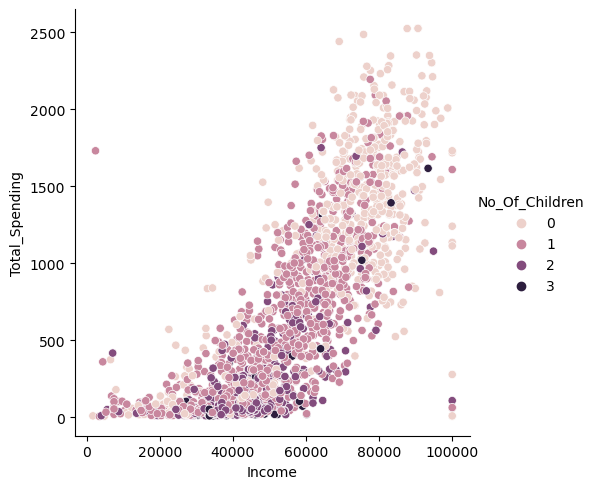

In [30]:
sns.relplot(data=df, x='Income', y='Total_Spending',hue="No_Of_Children")
plt.savefig('inc_child.png')

We observe a trend where individuals without children tend to spend more than those with children.

Additionally, individuals with a higher number of children tend to spend moderately compared to those with fewer children.

## Building KMeans Model and Clustering

In [31]:
data=df.copy()

In [32]:
from sklearn.cluster import KMeans

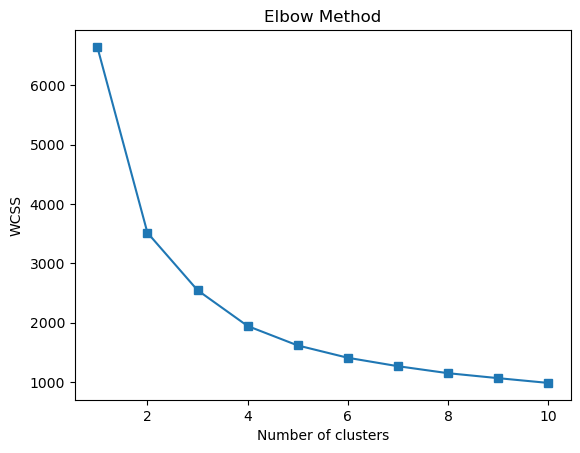

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming X is a NumPy array where each row represents a data point and columns represent features
# For example:
# X = np.array([[age1, income1, spending1], [age2, income2, spending2], ...])

# Extracting the features indices

# Extracting the features
X_features = data[['Age','Income','Total_Spending']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss,'-s')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()


In [34]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [35]:
data = data.assign(ClusterLabel= model.labels_)

In [36]:
result = data.groupby("ClusterLabel").agg({ "Age":"mean","Income":"median", "Total_Spending":"median"}).round()

In [43]:
result

,Age,Income,Total_Spending
ClusterLabel,,,
0,35.0,33385.0,69.0
1,36.0,71819.0,1188.0
2,54.0,47025.0,209.0
3,57.0,72222.0,1168.0


## Interpreting The Cluster

Cluster 0 : middle age low income low spending

Cluster 1 : middle age high income high spending

Cluster 2 : older low income low spending

Cluster 3 : older high income high spending

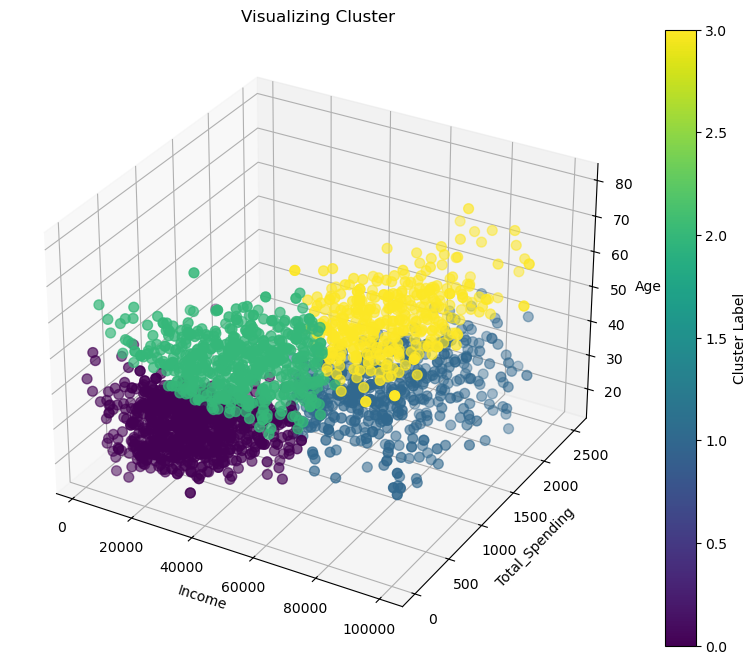

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'data' is your DataFrame containing the necessary columns

# Extracting data
x = data["Income"]
y = data["Total_Spending"]
z = data["Age"]
color = data["ClusterLabel"]

# Plotting the points
scatter = ax.scatter(x, y, z, c=color, cmap='viridis', s=50)

# Setting labels
ax.set_xlabel('Income')
ax.set_ylabel('Total_Spending')
ax.set_zlabel('Age')

# Adding a color bar
plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Adding a title
plt.title('Visualizing Cluster')

# Show the plot
plt.savefig('clusters.png')
plt.show()


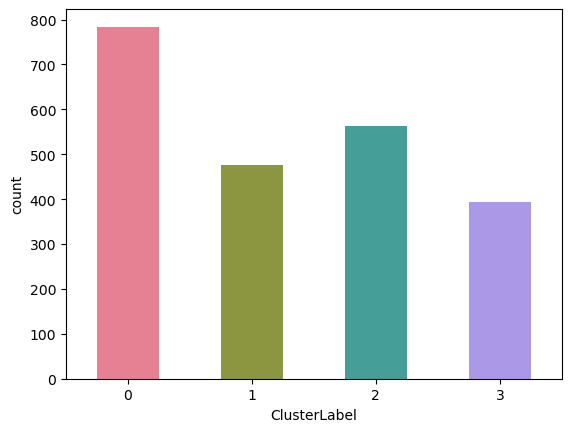

In [39]:
sns.countplot(x=data['ClusterLabel'],palette='husl',width=0.5)
plt.savefig('cluster2.png')

Cluster 0 has more customers followed by cluster 2, 1 then 3

## Profiling Cluster Label

<Figure size 640x480 with 0 Axes>

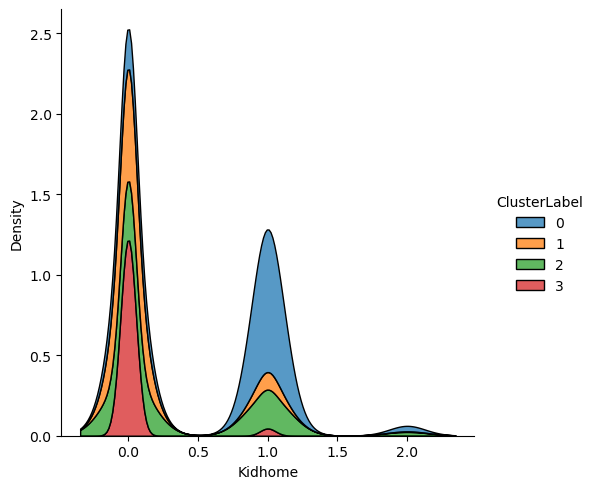

<Figure size 640x480 with 0 Axes>

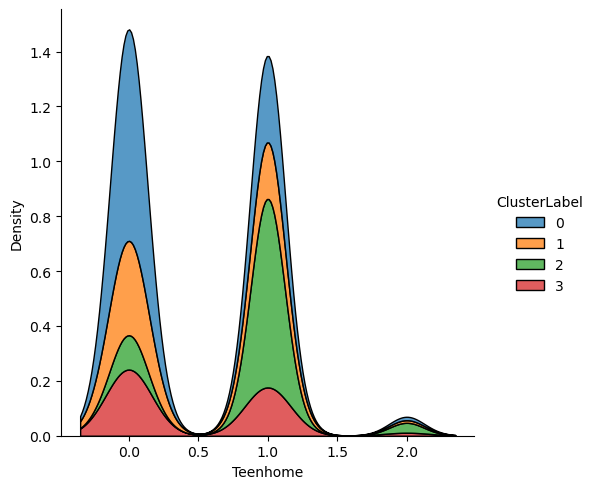

<Figure size 640x480 with 0 Axes>

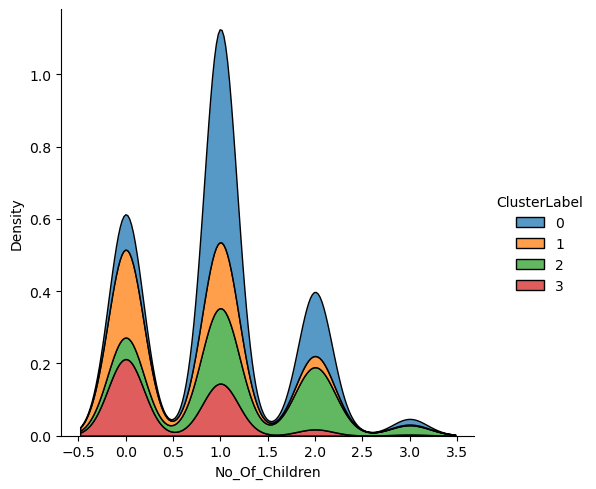

<Figure size 640x480 with 0 Axes>

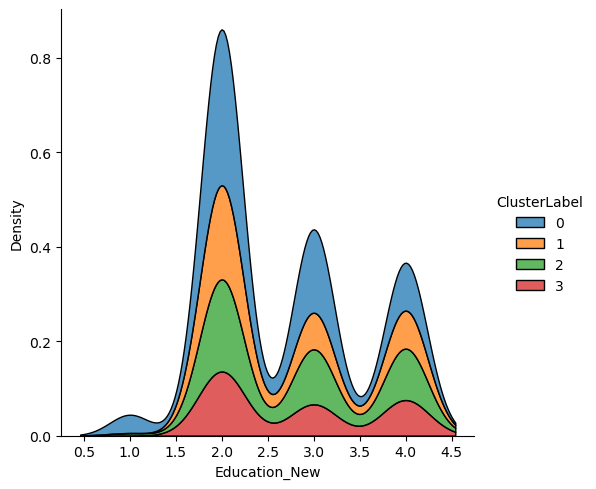

<Figure size 640x480 with 0 Axes>

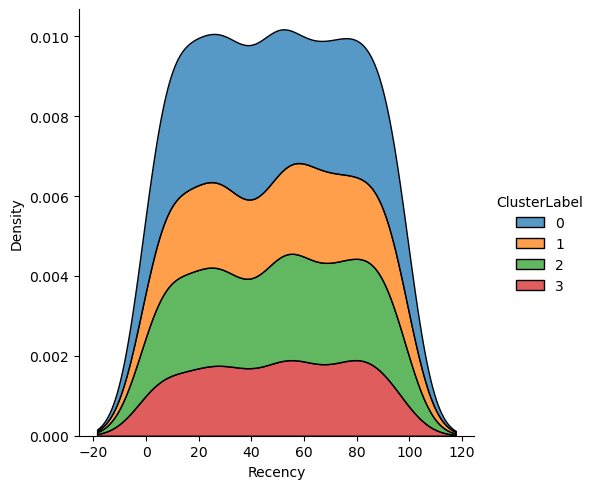

<Figure size 640x480 with 0 Axes>

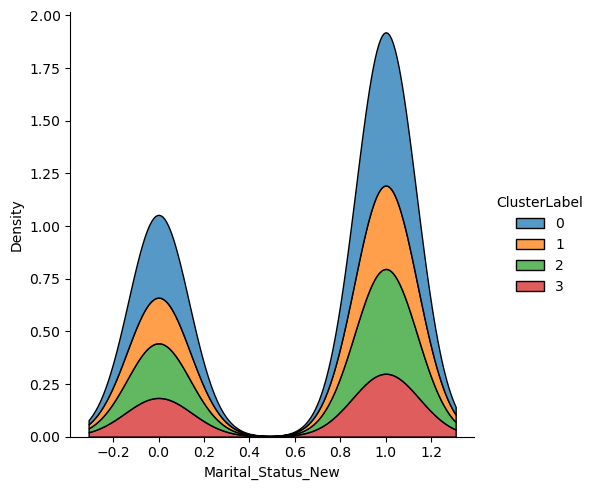

In [40]:
clus = [ "Kidhome","Teenhome", "No_Of_Children", "Education_New","Recency","Marital_Status_New"]
y = data['ClusterLabel']

for i in clus:
    plt.figure()
    sns.displot(data=data,  x=data[i],kind = 'kde', hue=y, multiple="stack",palette='tab10')
    plt.show()

Cluster 0:

Characterized by younger individuals with low incomes and low spending habits.
Majority have one child and no teenagers at home.
Mostly hold graduate or postgraduate degrees and live with a partsingle individuals.

Cluster 1:

Comprised of younger individuals with high incomes and high spending patterns.
Most have no children or one or two teenagers.
Predominantly graduates, with an even split between singles and those living with a partner.

Cluster 2:

Consists of older individuals with low incomes and minimal spending.
Typically have one or two children, with at least one teenager, indicating larger family sizes.
Majority hold graduate or master's degrees and are predominantly married, with some being single.

Cluster 3:

Characterized by older individuals with high incomes and substantial spending habits.
Often have no children or teenagers at home.
Generally possess higher levels of education compared to other clusters, with an equal distribution between married and single individuals.

## Purchasing Habits

<Figure size 640x480 with 0 Axes>

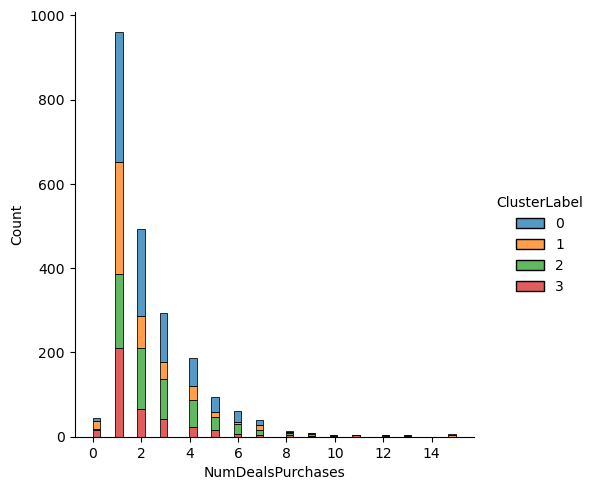

<Figure size 640x480 with 0 Axes>

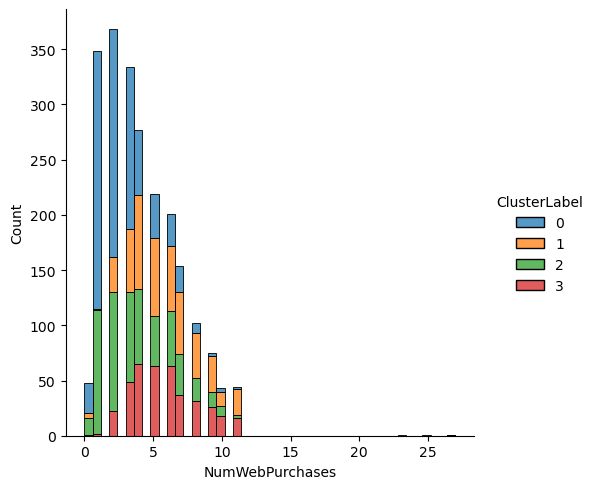

<Figure size 640x480 with 0 Axes>

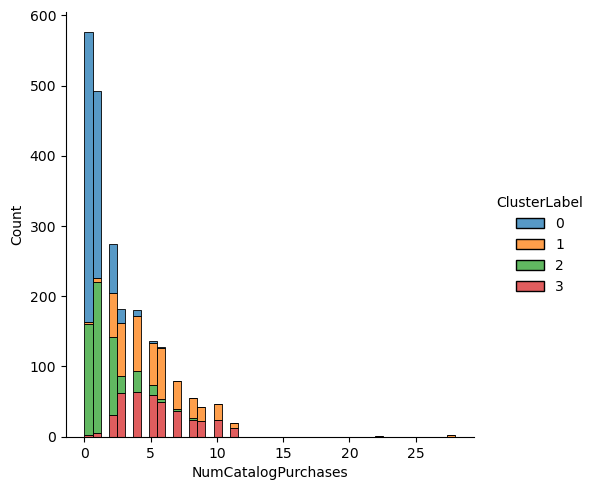

<Figure size 640x480 with 0 Axes>

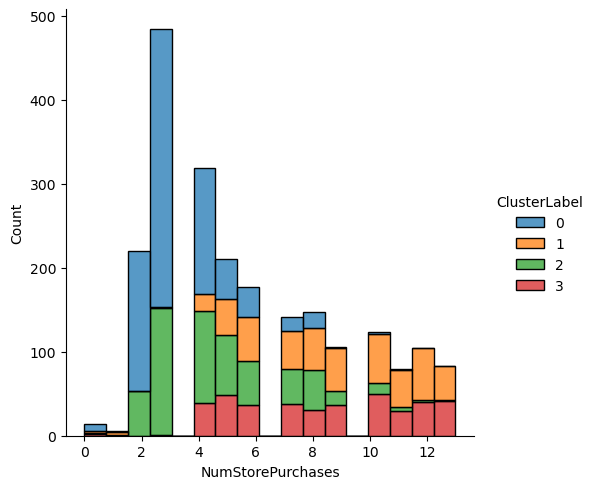

<Figure size 640x480 with 0 Axes>

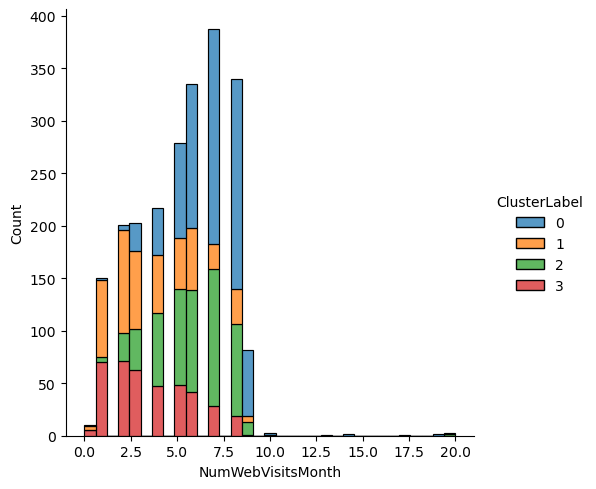

In [41]:
x = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
y = data['ClusterLabel']
for i in x:
    plt.figure()
    sns.displot(data=data,  x=data[i], multiple="stack", hue=y,palette='tab10')
    plt.show()

Cluster 0:

High engagement in store, discount, and web purchases.
Particularly active in web visits.
Demonstrates the highest participation in all types of purchases, with a notable preference for web-based transactions.

Cluster 1:

Primarily focused on discounted purchases, with some regular store transactions.
Among the most frequent customers, although slightly less engaged in web visits compared to Cluster 0.



Cluster 2:

Predominantly engages in web visits, discount purchases, and web-based transactions.
Shows a moderate level of activity in various purchase types, with a significant emphasis on online interactions.



Cluster 3:

Regularly makes discounted purchases with occasional store transactions.
Similar to Cluster 1 in terms of purchase behavior, with a moderate level of web visit frequency.
While all clusters show interest in store purchases, they generally prioritize other purchasing avenues, especially online transactions.


## Campaign Performance

<Figure size 640x480 with 0 Axes>

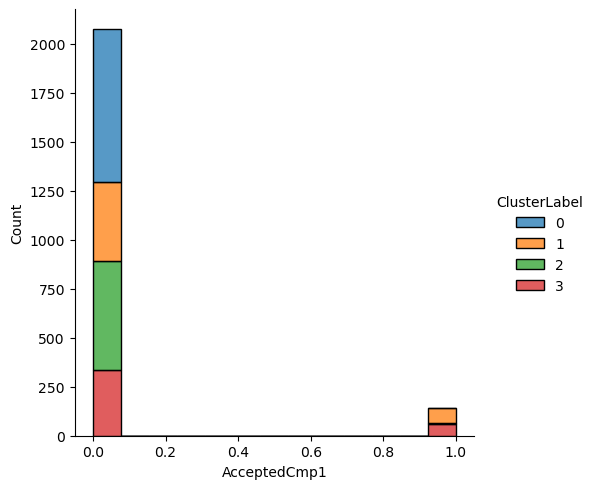

<Figure size 640x480 with 0 Axes>

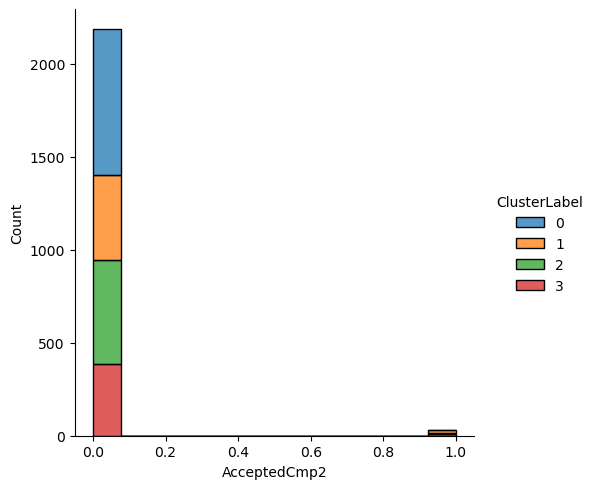

<Figure size 640x480 with 0 Axes>

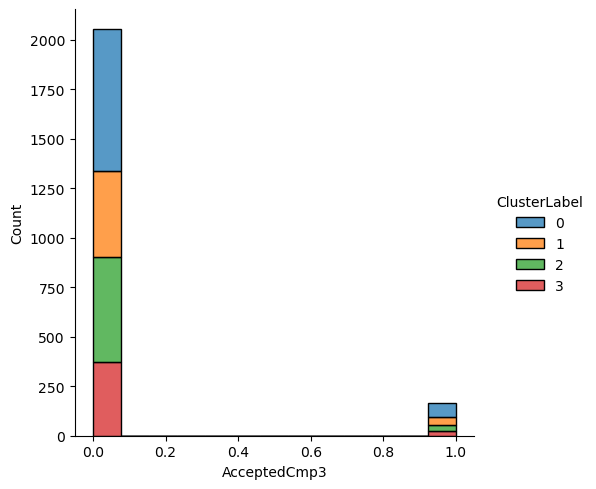

<Figure size 640x480 with 0 Axes>

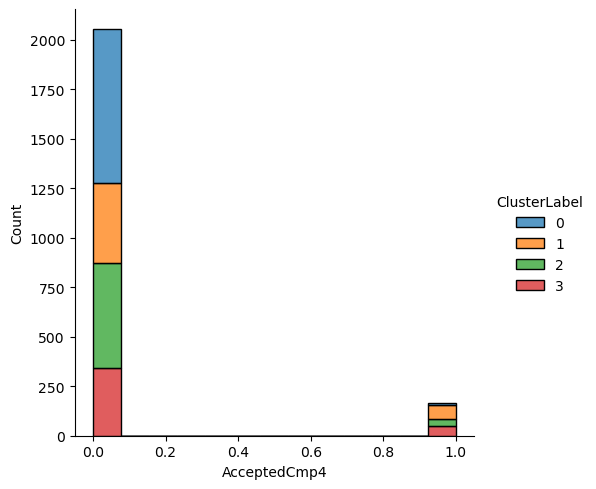

<Figure size 640x480 with 0 Axes>

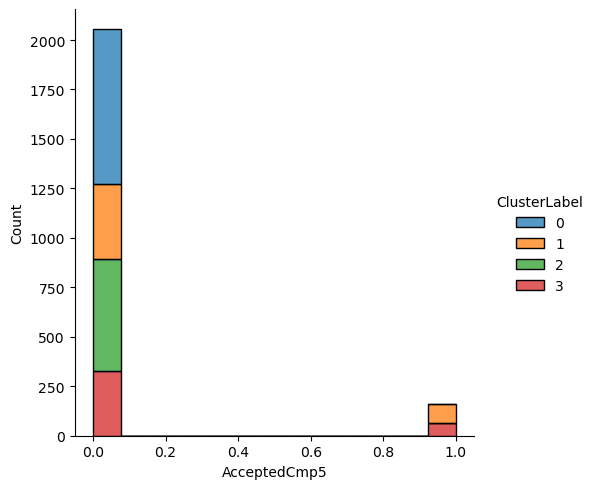

<Figure size 640x480 with 0 Axes>

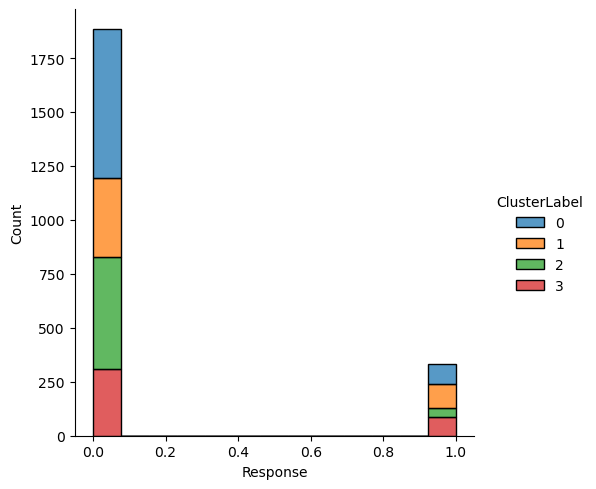

In [42]:
clus1 = [ 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
         'AcceptedCmp4','AcceptedCmp5','Response',]

for i in clus1:
    plt.figure()
    sns.displot(data=data,  x=data[i], hue="ClusterLabel", multiple="stack",palette='tab10',color = 'r')
    plt.show()

Cluster 0:

Acceptance of offers mostly during the 3rd and final campaigns.

Cluster 1:

Exhibited better response rates in campaigns other than the 2nd, particularly showing strong engagement during the last three campaigns.
    
Cluster 2:

Saw acquisition of some customers during the 3rd, 4th, and final campaigns.
    
Cluster 3:

Similar to Cluster 1, demonstrated higher acceptance rates in campaigns other than the 2nd, with notable performance during the last three campaigns.
    
Overall, the final campaign outperformed others, while the 2nd campaign showed limited effectiveness in attracting customers. Clusters 1 and 3 displayed similarities in their responses to the campaign offers.